In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from util import show_df

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [15, 8]

# Loading the data 

In [5]:
from util import get_envs, cached_load
base_dir = get_envs()["base_dir"]

authors = pd.read_csv(base_dir + "persons.csv")
authored = pd.read_csv(base_dir + "authored.csv")
publications = pd.read_csv(base_dir + "publications.csv")
citations = pd.read_csv(base_dir + "cited.csv")

In [6]:
# authors = authors.sample(100000)
# authored = authored.sample(100000)
# publications = publications.sample(100000)

# Statistical Overview

## Data

### Description

In [7]:
authors.describe(include='all')

,key,name
count,2436603,2436603
unique,2429524,2436329
top,wenan tan_pers,Yanan Jin
freq,3,3


In [8]:
authored.describe(include='all')

,author_name,publication_key
count,14394421,14394421
unique,2427700,4772570
top,h. vincent poor_pers,journals/corr/AartsenA13
freq,1784,287


In [9]:
publications[['key', 'type', 'title']].describe(include='all')

,key,type,title
count,4809168,4809168,4809168
unique,4809168,8,4685484
top,conf/interspeech/ChatterjeeS06,inproceedings,Editorial.
freq,1,2486041,5011


In [11]:
citations.describe(include='all')

,citing,cited
count,172576,172576
unique,8263,19895
top,books/aw/AbiteboulHV95,...
freq,741,60100


### Missing Values

In [12]:
authors.isna().sum()

key     0
name    0
dtype: int64

In [13]:
publications.isna().sum()

key      0
type     0
title    0
year     0
dtype: int64

In [41]:
publications[publications['year'] < 1000]

,key,type,title,year
2553598,dblpnote/ellipsis,article,…,0
2553599,dblpnote/error,article,(error),0
2553600,dblpnote/neverpublished,article,(was never published),0


In [39]:
authored.isna().sum()

author_name        0
publication_key    0
dtype: int64

### Clean Up

In [42]:
publications = publications[publications['year'] != 0]

In [85]:
citations = citations[citations['cited'] != '...']

## Publications 

### By Year

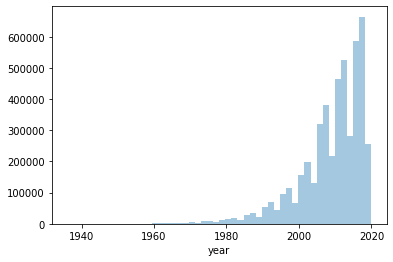

In [45]:
sns.distplot(publications['year'], kde=False);

### Citations

In [67]:
by_citing = citations.groupby('citing').size()

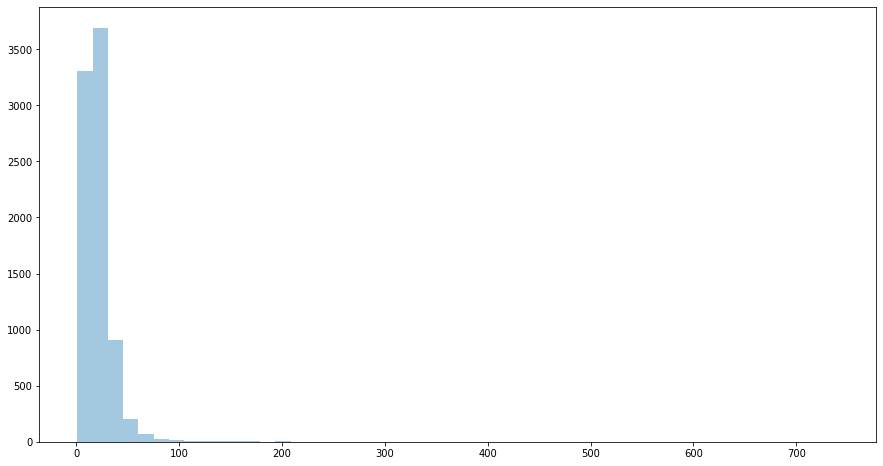

In [74]:
sns.distplot(by_citing, kde=False);

In [88]:
by_citing = by_citing.sort_values(ascending = False)[:10].to_frame('count')
by_citing = by_citing.reset_index()
by_citing = pd.merge(by_citing, publications, left_on='citing', right_on='key')

by_citing[['title', 'count']]

,title,count
0,Foundations of Databases.,741
1,Principles of Database and Knowledge-Base Syst...,643
2,Datenbanken: Implementierungstechniken,421
3,Concurrency Control and Recovery in Database S...,365
4,Query Evaluation Techniques for Large Databases.,348
5,Engineering a Compiler,342
6,The Theory of Relational Databases.,284
7,Query Optimization in Database Systems.,252
8,Orthogonally Persistent Object Systems,249
9,Temporal and Real-Time Databases: A Survey.,232


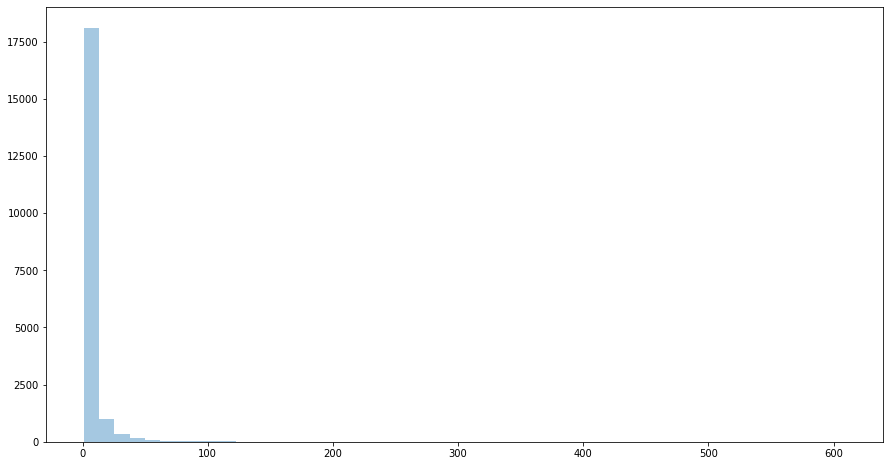

In [87]:
by_cited = citations.groupby('cited').size()

sns.distplot(by_cited, kde=False);

In [89]:
by_cited = by_cited.sort_values(ascending = False)[:10].to_frame('count')
by_cited = by_cited.reset_index()
by_cited = pd.merge(by_cited, publications, left_on='cited', right_on='key')

by_cited[['title', 'count']]

,title,count
0,The Entity-Relationship Model - Toward a Unifi...,609
1,A Relational Model of Data for Large Shared Da...,584
2,Access Path Selection in a Relational Database...,373
3,Principles of Database and Knowledge-Base Syst...,366
4,"Principles of Database Systems, 2nd Edition",354
5,The Notions of Consistency and Predicate Locks...,330
6,Concurrency Control and Recovery in Database S...,317
7,Database Abstractions: Aggregation and General...,317
8,Notes on Data Base Operating Systems.,302
9,Extending the Database Relational Model to Cap...,283


### Author Count

In [18]:
most_authors = authored.groupby('publication_key').count().sort_values('author_name', ascending=False).rename(columns={'author_name': 'author_count'})
most_authors_pubs = pd.merge(most_authors, publications, left_on = 'publication_key', right_on = 'key')[['title', 'year', 'type', 'author_count']]

most_authors_pubs[:10].style.set_caption('<b>Publications by the most authors</b>')

,title,year,type,author_count
0,The IceProd Framework: Distributed Data Processing for the IceCube Neutrino Observatory.,2013,article,287
1,The IceProd framework: Distributed data processing for the IceCube neutrino observatory.,2015,article,287
2,A promoter-level mammalian expression atlas.,2014,article,264
3,The Sixth Visual Object Tracking VOT2018 Challenge Results.,2018,inproceedings,155
4,The Visual Object Tracking VOT2016 Challenge Results.,2016,inproceedings,139
5,Length Sensing and Control in the Virgo Gravitational Wave Interferometer.,2006,article,119
6,Machine Learning in High Energy Physics Community White Paper.,2018,article,118
7,An overview of the BlueGene/L Supercomputer.,2002,inproceedings,115
8,Theano: A Python framework for fast computation of mathematical expressions.,2016,article,112
9,"The BioMart community portal: an innovative alternative to large, centralized data repositories.",2015,article,105


In [19]:
authors_pubs = pd.merge(most_authors, publications, left_on = 'publication_key', right_on = 'key')[['key', 'title', 'year', 'type', 'author_count']]

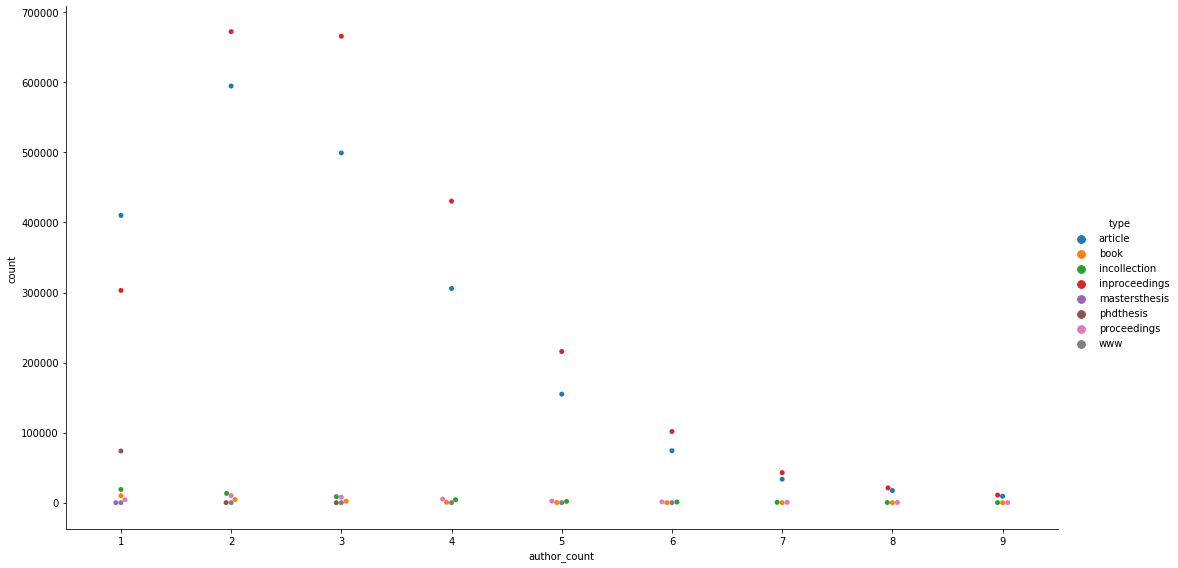

In [22]:
most_authors_type = authors_pubs.groupby(['author_count', 'type']).size().to_frame('count')
most_authors_type = most_authors_type.reset_index()
most_authors_type = most_authors_type[most_authors_type['author_count'] < 10]

sns.catplot(x='author_count', y='count', hue='type', kind='swarm', data=most_authors_type, height=8, aspect=15/8);

In [10]:
most_authors_type

,author_count,type,count
0,1,article,900
1,1,book,8
2,1,incollection,14
3,1,inproceedings,1112
4,1,phdthesis,14
5,1,proceedings,17
6,2,article,9
7,2,inproceedings,10


# Graph Analysis

## Clustering Coefficient

$G(N, A)$ \
$S_i$ - a set of neigbours of $ith$ node \
$n_i$ - cardinality of $S_i$ 

$\eta(i) = \frac{|(j, k) \in A: j \in S_i, k \in S_i|}{n_i \choose{2}}$

## Degree distribution

In [10]:
coauthorships = pd.read_csv(base_dir + 'coauthorships.csv',names= ['a_key','b_key','count'])

In [11]:
a = coauthorships[['a_key','count']]
a.columns = ['key','count']
b = coauthorships[['b_key','count']]
b.columns = ['key','count']

author_edges = pd.concat([a,b])

In [12]:
author_degrees = author_edges.groupby('key',as_index = False).agg(['count','sum'])

In [13]:
author_degrees = author_degrees['count'].reset_index()

In [39]:
from sklearn.linear_model import LinearRegression


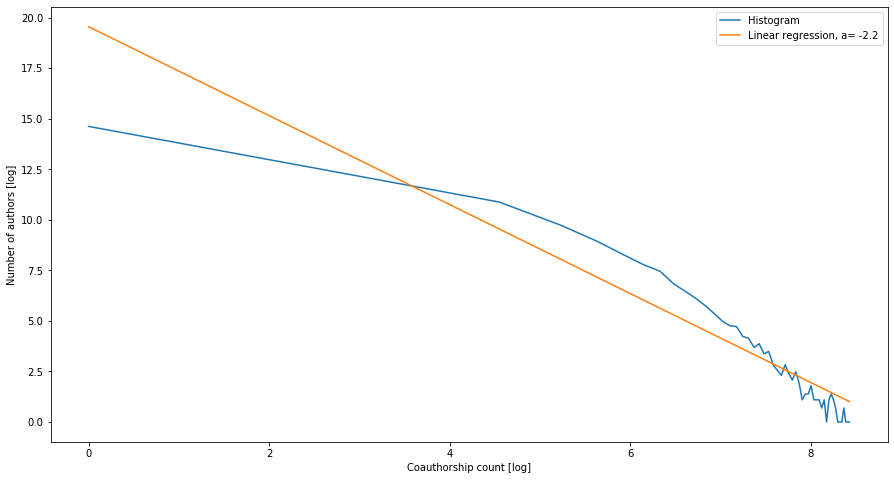

In [76]:
hist,bin_edges= np.histogram(author_degrees['sum'],bins=50)
# hist,bin_edges= np.histogram(author_degrees['count'],bins=50)
x = bin_edges[:-1]
y = hist
x [ x==0 ] = 1
y [ y ==0 ] = 1
x= np.log(x)
y = np.log(y)

lr = LinearRegression().fit(x[:,np.newaxis],y)
f = lambda x: lr.intercept_+ x * lr.coef_
line_x = np.arange(0,max(x),0.01)
line_y = f(line_x)

plt.plot(x,y,)
plt.plot(line_x,line_y)
# plt.xlabel("Coauthor count [log]")
plt.xlabel("Coauthorship count [log]")
plt.ylabel("Number of authors [log]")
plt.title
plt.legend(["Histogram","Linear regression, a= {}".format(round(float(lr.coef_),2))])

In [14]:
def presentDegrees(series:pd.Series,label:str):
    quantiles =  series.quantile([0.5,0.8,0.9,0.99,0.999,1])
    limit = quantiles[0.99]
    print(quantiles)
    plot = series.where(series <= limit).hist(bins=50)
    plot.set_xlabel(label)
    plot.set_ylabel('Number of authors')
    plot.set_yscale('log')
    plot.set_xscale('log')
    return plot

0.500       5.0
0.800      12.0
0.900      22.0
0.990     103.0
0.999     286.0
1.000    3306.0
Name: count, dtype: float64


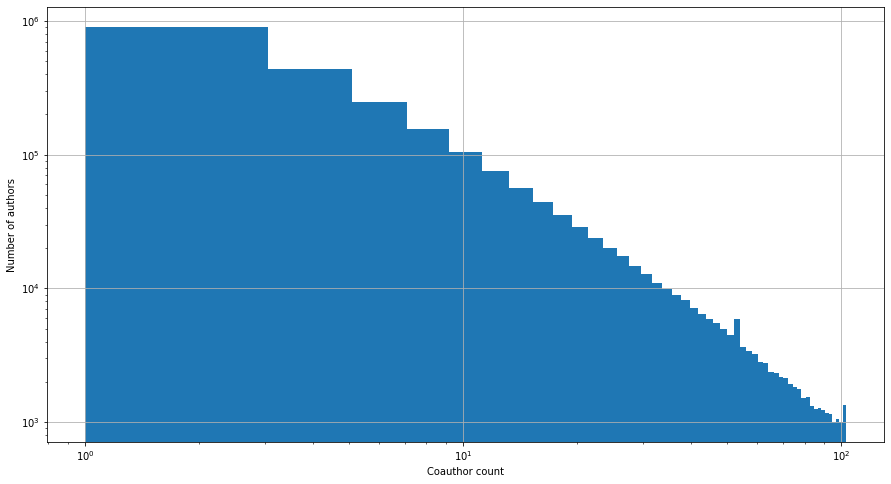

In [20]:
presentDegrees(author_degrees['count'],'Coauthor count')

0.500       6.0
0.800      18.0
0.900      39.0
0.990     249.0
0.999     758.0
1.000    4681.0
Name: sum, dtype: float64


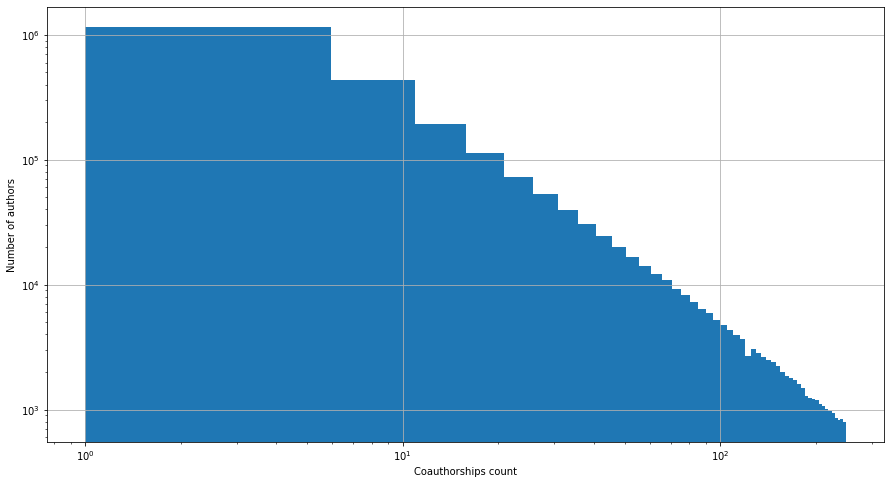

In [21]:
presentDegrees(author_degrees['sum'],'Coauthorships count')